In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2

def filterCal(i, j, userfilter, imageUser) :
    return ( userfilter[0][0]*imageUser[i-1][j-1] + userfilter[0][1]*imageUser[i-1][j] + 
             userfilter[0][2]*imageUser[i-1][j+1] + userfilter[1][0]*imageUser[i][j-1] +
            userfilter[1][1]*imageUser[i][j] + userfilter[1][2]*imageUser[i][j+1] +
            userfilter[2][0]*imageUser[i+1][j-1] + userfilter[2][1]*imageUser[i+1][j] + 
            userfilter[2][2]*imageUser[i+1][j+1] )

def hist_plot(image):
      
    x = np.zeros(256);
    y = np.zeros(256);
    
    m,n = image.shape
       
    for i in range(m):
        for j in range(n):
            y[image[i][j]] += 1
          
    return (x, y)



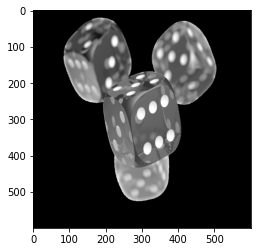

(600, 600)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


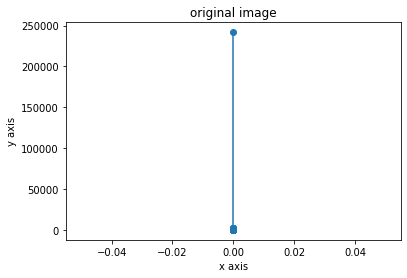

In [ ]:
imageUser = cv2.imread('/content/dice.png', 0)
imageRows , imageCols = imageUser.shape
imageUser = cv2.resize(imageUser, (min(imageRows , imageCols), min(imageRows , imageCols))) 
plt.imshow(imageUser, cmap="gray")
plt.show()
print(imageUser.shape)

imageRows , imageCols = imageUser.shape
r1, count1 = hist_plot(imageUser)
  
plt.stem(r1, count1)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('original image')
plt.show()


In [ ]:
print("Input Filter from User")
numbers = input("Enter the values for 3*3 filter :")
userFilter = np.array(list(map(int, numbers.split()))).reshape(3, 3)
print("User Filter")
print(userFilter) 
    


Input Filter from User


In [ ]:

#Stride 1 + Without Padding
imageAfterCal = np.zeros([imageRows-2, imageCols-2])  
x=0
for i in range(1 , imageRows - 1) :
    y=0
    for j in range(1 , imageCols - 1):
        imageAfterCal[x][y] =  filterCal(i,j,userFilter,imageUser)
        y = y+1
    x=x+1

print(imageAfterCal.shape)    
#print(imageAfterCal)

r1, count1 = hist_plot(imageAfterCal)
  
plt.stem(r1, count1)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Stride 1 + Without Padding image')
plt.show()
plt.imshow(imageAfterCal, cmap="gray")
plt.show()

In [ ]:
#Stride 1 + With Padding
imagePad = np.zeros([imageRows+2, imageCols+2]) 
imagePad[1:imageRows+1,1:imageCols+1] = imageUser
imageAfterCal1 =  np.zeros([imageRows, imageCols])

x=0
for i in range(1 , len(imagePad)-1) :
    y=0
    for j in range(1 , len(imagePad[0])-1):
        imageAfterCal1[x][y] =  filterCal(i,j,userFilter,imagePad)
        y = y+1
    x=x+1

print(imageAfterCal1.shape)    
#print(imageAfterCal1)

r1, count1 = hist_plot(imageAfterCal1)
  
plt.stem(r1, count1)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Stride 1 + With Padding image')
plt.show()
plt.imshow(imageAfterCal1, cmap="gray")
plt.show()

In [ ]:
#Stride 2 + Without Padding
imageAfterCal3  = np.zeros([int(imageRows/2), int(imageCols/2)])
x=0
for i in range(1 , imageRows - 1, 2) :
    if(j+3 >= imageRows - 1 ):
        break;
    y = 0
    for j in range(1 , imageCols - 1, 2):
        if(j+3 >= imageCols - 1 ):
            break;
        imageAfterCal3[x][y] = filterCal(i,j,userFilter,imageUser)
        y = y+1
    x = x+1

print(imageAfterCal3.shape)    
#print(imageAfterCal3)

r1, count1 = hist_plot(imageAfterCal3)
  
plt.stem(r1, count1)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Stride 2 + Without Padding image')
plt.show()
plt.imshow(imageAfterCal3, cmap="gray")
plt.show()

In [ ]:

#Stride 2 + With Padding
imagePad1  = np.pad(imageUser, pad_width=math.ceil(imageRows/2), mode='constant',
               constant_values=0)
print(imagePad1.shape) 
imageAfterCal4  = np.zeros([imageRows, imageCols])
x=0
for i in range(1 , imageRows*2 - 1, 2) :
    if(i+3 >= imageRows*2 - 1 ):
        break;
    y = 0
    for j in range(1 , imageCols*2 - 1, 2):
        if(j+3 >= imageCols*2 - 1 ):
            break;
        imageAfterCal4[x][y] = filterCal(i,j,userFilter,imagePad1)
        y=y+1
    x = x+1
print(imageAfterCal4.shape)    
#print(imageAfterCal4)

r1, count1 = hist_plot(imageAfterCal4)
  
plt.stem(r1, count1)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Stride 2 + With Padding image')
plt.show()
plt.imshow(imageAfterCal4, cmap="gray")
plt.show()